In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from model import Model
from tqdm import tqdm

In [61]:
ENV = "Test"

In [62]:
if ENV == "Test":
    folder_path = "./data/test"
    users_file_name = "./data/usersTest.csv"
else:
    folder_path = "./data"
    users_file_name = f"./data/users{ENV}.csv"
movies = pd.read_csv(f'{folder_path}/movies.csv')
ratings = pd.read_csv(f'{folder_path}/ratings.csv')

In [63]:
train_ratings, test_ratings = train_test_split(ratings, test_size=0.001, shuffle=True, random_state=42)

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
model = Model(train_ratings, preprocessed_users_file_name=users_file_name, log=True)
model.fit(movies.copy(), update_users=True)

Fitting model...
Selecting relevant genres...
Selected genres: ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Documentary', 'Horror', '(no genres listed)', 'Crime', 'Adventure', 'Sci-Fi', 'Animation', 'Children', 'Mystery', 'Fantasy'] selected at 0.0006262779235839844 minute.
Preprocessing users...
Preprocessing users |██████████████████████████████████████████████████| 100.0% Complete
Preprocessed users at 0.9927994211514791 minute.
Model fitted at 1.131024471918742 minute.


In [66]:
# model.getBaseline(test_ratings)
# print("Baseline MSE: ", model.getBaseline(test_ratings))

In [68]:
k = 15
model = Model(train_ratings, k)
model.fit(movies.copy())
mse = model.getMSE(test_ratings)
print(f"k = {k}, MSE = {mse}")

100%|██████████| 33833/33833 [00:21<00:00, 1589.88it/s]

k = 15, MSE = 0.030969662682564954


In [69]:
errors = {}
for k in range(1, 50):
    model = Model(train_ratings, k)
    model.fit(movies.copy())
    mse = model.getMSE(test_ratings)
    errors[k] = mse
    print(f"k = {k}, MSE = {mse}")

100%|██████████| 33833/33833 [00:18<00:00, 1793.59it/s]


k = 1, MSE = 0.03728427686295702


100%|██████████| 33833/33833 [00:18<00:00, 1784.81it/s]


k = 2, MSE = 0.03344227011491843


100%|██████████| 33833/33833 [00:19<00:00, 1748.38it/s]


k = 3, MSE = 0.03210018434009371


100%|██████████| 33833/33833 [00:20<00:00, 1660.99it/s]


k = 4, MSE = 0.031621812180273


100%|██████████| 33833/33833 [00:21<00:00, 1591.66it/s]


k = 5, MSE = 0.0316195936602123


100%|██████████| 33833/33833 [00:20<00:00, 1665.02it/s]


k = 6, MSE = 0.03127343637091704


100%|██████████| 33833/33833 [00:20<00:00, 1646.20it/s]


k = 7, MSE = 0.03132833089762587


100%|██████████| 33833/33833 [00:20<00:00, 1633.67it/s]


k = 8, MSE = 0.031084524418697593


100%|██████████| 33833/33833 [00:20<00:00, 1631.24it/s]


k = 9, MSE = 0.03126492499749952


100%|██████████| 33833/33833 [00:21<00:00, 1543.12it/s]


k = 10, MSE = 0.030864330846628166


100%|██████████| 33833/33833 [00:21<00:00, 1554.19it/s]


k = 11, MSE = 0.030997397364822193


100%|██████████| 33833/33833 [00:22<00:00, 1530.17it/s]


k = 12, MSE = 0.030807344181122066


100%|██████████| 33833/33833 [00:22<00:00, 1485.61it/s]


k = 13, MSE = 0.030938146174349854


100%|██████████| 33833/33833 [00:22<00:00, 1508.47it/s]


k = 14, MSE = 0.03090936001960178


100%|██████████| 33833/33833 [00:21<00:00, 1549.78it/s]


k = 15, MSE = 0.0308086870183


100%|██████████| 33833/33833 [00:21<00:00, 1540.32it/s]


k = 16, MSE = 0.03080300973225181


100%|██████████| 33833/33833 [00:23<00:00, 1449.49it/s]


k = 17, MSE = 0.030960346319887002


100%|██████████| 33833/33833 [00:23<00:00, 1462.43it/s]


k = 18, MSE = 0.03095677575295726


100%|██████████| 33833/33833 [00:22<00:00, 1509.65it/s]


k = 19, MSE = 0.031133619720029624


100%|██████████| 33833/33833 [00:22<00:00, 1479.98it/s]


k = 20, MSE = 0.03096964641543704


100%|██████████| 33833/33833 [00:22<00:00, 1504.33it/s]


k = 21, MSE = 0.03097944045262843


100%|██████████| 33833/33833 [00:23<00:00, 1461.37it/s]


k = 22, MSE = 0.03097231125161115


100%|██████████| 33833/33833 [00:24<00:00, 1407.16it/s]


k = 23, MSE = 0.03112484619647224


100%|██████████| 33833/33833 [00:22<00:00, 1472.97it/s]


k = 24, MSE = 0.030942059173096118


100%|██████████| 33833/33833 [00:23<00:00, 1466.68it/s]


k = 25, MSE = 0.031019495195582704


100%|██████████| 33833/33833 [00:23<00:00, 1457.65it/s]


k = 26, MSE = 0.031157829115940554


100%|██████████| 33833/33833 [00:23<00:00, 1425.74it/s]


k = 27, MSE = 0.03114867835419061


100%|██████████| 33833/33833 [00:23<00:00, 1435.52it/s]


k = 28, MSE = 0.031246691331454426


100%|██████████| 33833/33833 [00:24<00:00, 1377.71it/s]


k = 29, MSE = 0.031153635660055735


100%|██████████| 33833/33833 [00:23<00:00, 1436.56it/s]


k = 30, MSE = 0.031075791325119846


100%|██████████| 33833/33833 [00:23<00:00, 1437.55it/s]


k = 31, MSE = 0.031030138336923935


100%|██████████| 33833/33833 [00:23<00:00, 1421.45it/s]


k = 32, MSE = 0.031088038309425876


100%|██████████| 33833/33833 [00:23<00:00, 1420.97it/s]


k = 33, MSE = 0.031076316134691574


100%|██████████| 33833/33833 [00:24<00:00, 1398.93it/s]


k = 34, MSE = 0.031057930618968603


100%|██████████| 33833/33833 [00:24<00:00, 1382.79it/s]


k = 35, MSE = 0.031133960781449938


100%|██████████| 33833/33833 [00:24<00:00, 1399.31it/s]


k = 36, MSE = 0.031105068103952322


100%|██████████| 33833/33833 [00:25<00:00, 1346.52it/s]


k = 37, MSE = 0.030981220624274986


100%|██████████| 33833/33833 [00:24<00:00, 1384.18it/s]


k = 38, MSE = 0.030972270602322084


100%|██████████| 33833/33833 [00:25<00:00, 1328.77it/s]


k = 39, MSE = 0.031095411363652646


100%|██████████| 33833/33833 [00:24<00:00, 1358.78it/s]


k = 40, MSE = 0.031170265383555034


100%|██████████| 33833/33833 [00:25<00:00, 1307.18it/s]


k = 41, MSE = 0.03125976436913136


100%|██████████| 33833/33833 [00:26<00:00, 1292.21it/s]


k = 42, MSE = 0.031112008405045608


100%|██████████| 33833/33833 [00:25<00:00, 1350.74it/s]


k = 43, MSE = 0.031062609187552985


100%|██████████| 33833/33833 [00:25<00:00, 1323.75it/s]


k = 44, MSE = 0.031151844072876956


100%|██████████| 33833/33833 [00:25<00:00, 1303.12it/s]


k = 45, MSE = 0.03099587595644456


100%|██████████| 33833/33833 [00:25<00:00, 1324.53it/s]


k = 46, MSE = 0.03123261273959191


100%|██████████| 33833/33833 [00:25<00:00, 1344.28it/s]


k = 47, MSE = 0.031119652153118484


100%|██████████| 33833/33833 [00:26<00:00, 1291.97it/s]


k = 48, MSE = 0.03114315220552703


100%|██████████| 33833/33833 [00:26<00:00, 1275.54it/s]

k = 49, MSE = 0.031008317324399598


In [70]:
list(errors.items())

[(1, 0.03728427686295702),
 (2, 0.03344227011491843),
 (3, 0.03210018434009371),
 (4, 0.031621812180273),
 (5, 0.0316195936602123),
 (6, 0.03127343637091704),
 (7, 0.03132833089762587),
 (8, 0.031084524418697593),
 (9, 0.03126492499749952),
 (10, 0.030864330846628166),
 (11, 0.030997397364822193),
 (12, 0.030807344181122066),
 (13, 0.030938146174349854),
 (14, 0.03090936001960178),
 (15, 0.0308086870183),
 (16, 0.03080300973225181),
 (17, 0.030960346319887002),
 (18, 0.03095677575295726),
 (19, 0.031133619720029624),
 (20, 0.03096964641543704),
 (21, 0.03097944045262843),
 (22, 0.03097231125161115),
 (23, 0.03112484619647224),
 (24, 0.030942059173096118),
 (25, 0.031019495195582704),
 (26, 0.031157829115940554),
 (27, 0.03114867835419061),
 (28, 0.031246691331454426),
 (29, 0.031153635660055735),
 (30, 0.031075791325119846),
 (31, 0.031030138336923935),
 (32, 0.031088038309425876),
 (33, 0.031076316134691574),
 (34, 0.031057930618968603),
 (35, 0.031133960781449938),
 (36, 0.0311050681

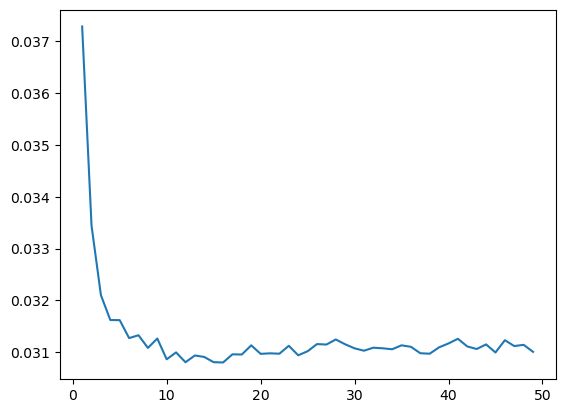

In [71]:
import matplotlib.pyplot as plt

plt.plot(errors.keys(), errors.values())

In [72]:
model.save_users(f"Clustering{ENV}Users{k}.csv")